In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parameters
size = 100  # Size of the domain
seed_position = (size - 1, size // 2)  # Seed at the bottom center
eta = 10  # Shape parameter
iterations = 1000  # Number of growth steps
omega = 1.9  # Over-relaxation parameter
epsilon = 1e-5  # epsilon for SOR convergence

# Initialize domain
domain = np.zeros((size, size))
domain[seed_position] = 1  # Place the initial seed

# Initialize the nutrient concentration grid with highest concentration at the top
concentration = np.linspace(1, 0, size).reshape(-1, 1)  # Gradient from top (1) to bottom (0)
concentration = np.tile(concentration, (1, size))  # Extend the gradient horizontally


In [3]:
# Function to find growth candidates
def find_growth_candidates(domain):
    candidates = []
    for i in range(1, domain.shape[0] - 1):
        for j in range(1, domain.shape[1] - 1):
            if domain[i, j] == 0 and np.any(domain[i-1:i+2, j-1:j+2] == 1):
                candidates.append((i, j))
    return candidates

In [4]:
# SOR method to solve the Laplace equation
def solve_laplace(concentration, domain, omega, epsilon):
    diff = np.inf
    while diff > epsilon:
        old_concentration = concentration.copy()
        for i in range(1, size - 1):
            for j in range(1, size - 1):
                if domain[i, j] == 0:  # Update only if not part of the cluster
                    concentration[i, j] = ((1 - omega) * concentration[i, j] +
                                           omega * 0.25 * (concentration[i+1, j] + concentration[i-1, j] +
                                                           concentration[i, j+1] + concentration[i, j-1]))
        diff = np.max(np.abs(concentration - old_concentration))
    return concentration

In [5]:
# Growth function
def grow(domain, concentration, omega, eta):
    concentration = solve_laplace(concentration, domain, omega, epsilon)
    candidates = find_growth_candidates(domain)
    if not candidates:
        return domain, concentration  # No more growth possible

    probabilities = [concentration[i, j] ** eta for i, j in candidates]
    probabilities /= np.sum(probabilities)  # Normalize to make it a probability distribution


    # Select and add new growth site
    growth_site = candidates[np.random.choice(len(candidates), p=probabilities)]
    domain[growth_site] = 1
    return domain, concentration

In [11]:
def sim(domain, concentration, omega, iterations, eta):
    for _ in range(iterations):
        domain, concentration = grow(domain, concentration, omega, eta)
    return domain, concentration

In [20]:
def num_seeds(domain):
    return np.sum(domain)

In [12]:
domain, concentration = sim(domain, concentration, omega, iterations, eta)

KeyboardInterrupt: 

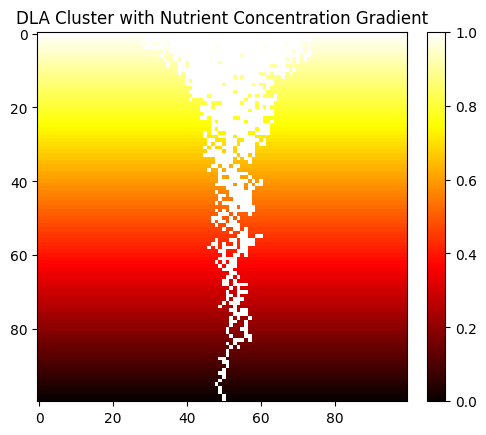

In [8]:
fig, ax = plt.subplots()
cmap = ax.imshow(concentration, cmap='hot', interpolation='nearest')
fig.colorbar(cmap, ax=ax, fraction=0.046, pad=0.04)
cluster_overlay = np.ma.masked_where(domain == 0, domain)
ax.imshow(cluster_overlay, cmap='Greys', interpolation='nearest')
ax.set_title('DLA Cluster with Nutrient Concentration Gradient')
plt.show()

<>:30: SyntaxWarning: invalid escape sequence '\e'
<>:30: SyntaxWarning: invalid escape sequence '\e'
C:\Users\sacha\AppData\Local\Temp\ipykernel_32772\3313719513.py:30: SyntaxWarning: invalid escape sequence '\e'
  ax.set_xlabel(f"$\eta$ = {eta}", fontsize=14)
C:\Users\sacha\AppData\Local\Temp\ipykernel_32772\3313719513.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


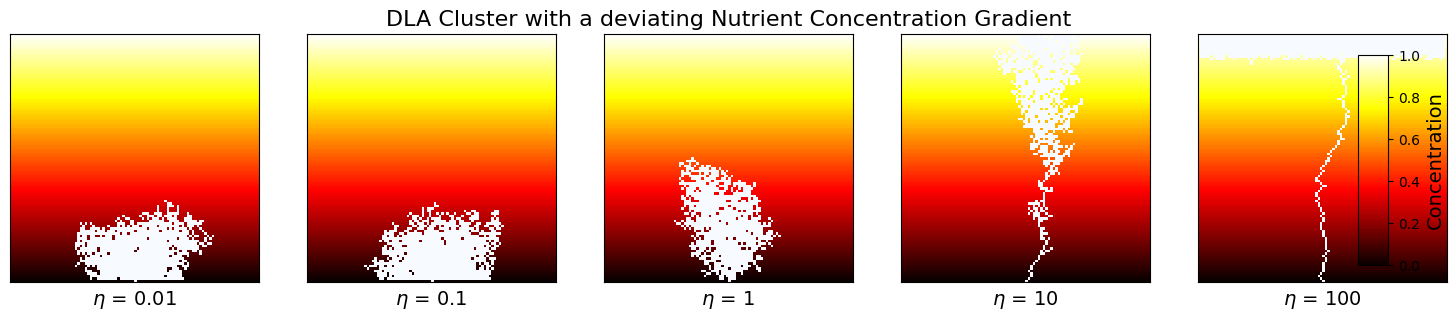

In [17]:
eta_list = [ 0.01, 0.1, 1, 10, 100]

# Plotting
fig, axes = plt.subplots(1, len(eta_list), figsize=(17, 3))

for i, eta in enumerate(eta_list):
    # Parameters
    size = 100  # Size of the domain
    seed_position = (size - 1, size // 2)  # Seed at the bottom center
    iterations = 1000  # Number of growth steps
    omega = 1.9  # Over-relaxation parameter
    epsilon = 1e-5  # epsilon for SOR convergence

    # Initialize domain
    domain = np.zeros((size, size))
    domain[seed_position] = 1  # Place the initial seed

    # Initialize the nutrient concentration grid with highest concentration at the top
    concentration = np.linspace(1, 0, size).reshape(-1, 1)  # Gradient from top (1) to bottom (0)
    concentration = np.tile(concentration, (1, size))  # Extend the gradient horizontally

    ax = axes[i]
    domain, concentration = sim(domain, concentration, omega, iterations, eta)
    cmap = ax.imshow(concentration, cmap='hot', interpolation='nearest')
    # fig.colorbar(cmap, ax=ax, fraction=0.046, pad=0.04)
    cluster_overlay = np.ma.masked_where(domain == 0, domain)
    im = ax.imshow(cluster_overlay, cmap = 'coolwarm', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f"$\eta$ = {eta}", fontsize=14)

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(cmap, cax=cbar_ax)
cbar.set_label('Concentration', fontsize=14)

axes[2].set_title(f'DLA Cluster with a deviating Nutrient Concentration Gradient ($\eta$)', fontsize=16, loc='center')

plt.tight_layout()
plt.show()


In [19]:
seed_position = (size - 1, size // 2)  # Seed at the bottom center
iterations = 1000  # Number of growth steps
omega = 1.9  # Over-relaxation parameter
epsilon = 1e-5  # epsilon for SOR convergence
size = 100  # Size of the domain

for eta in np.arange(0.01, 100, 10):
    n_seeds = []
    for omega in np.arange(1.7, 1.99, 0.05):
        temp_seeds = []
        for runs in range(5):
            # Initialize domain
            domain = np.zeros((size, size))
            domain[seed_position] = 1  # Place the initial seed

            # Initialize the nutrient concentration grid with highest concentration at the top
            concentration = np.linspace(1, 0, size).reshape(-1, 1)  # Gradient from top (1) to bottom (0)
            concentration = np.tile(concentration, (1, size))  # Extend the gradient horizontally

            domain, concentration = sim(domain, concentration, omega, iterations, eta)
            temp_seeds.append(num_seeds(domain))
            
        n_seeds.append(np.mean(temp_seeds))
        print(omega)

    plt.plot(np.linspace(1.7, 1.99, len(n_seeds)), n_seeds, label = f"$\eta$ = {eta}")
    plt.scatter(np.linspace(1.7, 1.99, len(n_seeds)), n_seeds, s=5)

plt.legend()
plt.grid(True)
plt.xlabel('Omega $(\omega)$')
plt.ylabel('Number of seeds')
plt.title('Number of seeds in DLA Cluster \nfor Optimal $\omega$ by varying $\eta$ (SOR)')

plt.show()

<>:26: SyntaxWarning: invalid escape sequence '\e'
<>:31: SyntaxWarning: invalid escape sequence '\o'
<>:33: SyntaxWarning: invalid escape sequence '\o'
<>:26: SyntaxWarning: invalid escape sequence '\e'
<>:31: SyntaxWarning: invalid escape sequence '\o'
<>:33: SyntaxWarning: invalid escape sequence '\o'
C:\Users\sacha\AppData\Local\Temp\ipykernel_32772\1360217440.py:26: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(np.linspace(1.7, 1.99, len(n_seeds)), n_seeds, label = f"$\eta$ = {eta}")
C:\Users\sacha\AppData\Local\Temp\ipykernel_32772\1360217440.py:31: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Omega $(\omega)$')
C:\Users\sacha\AppData\Local\Temp\ipykernel_32772\1360217440.py:33: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Number of seeds in DLA Cluster \nfor Optimal $\omega$ by varying $\eta$ (SOR)')
C:\Users\sacha\AppData\Local\Temp\ipykernel_32772\1360217440.py:26: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(np.linspace(1.7, 1.99, l

NameError: name 'num_seeds' is not defined

# Monte Carlo


In [10]:
def run_dla(size, seed_position, num_walkers):
    domain = np.zeros((size, size), dtype=int)
    domain[seed_position] = 1  # Start with a seed

    # Function for performing a single random walk
    def random_walk():
        # Start position for the walker at the top boundary
        x, y = 0, np.random.randint(size)
        
        # Perform the walk until the walker sticks or exits the domain
        while True:
            # Step
            step_x, step_y = np.random.choice([-1, 0, 1]), np.random.choice([-1, 0, 1])
            # No diags
            if step_x != 0 and step_y != 0:
                continue
            
            x, y = x + step_x, (y + step_y) % size  # Apply periodic boundary conditions horizontally
            
            # Check top and bottom boundaries
            if x < 0:
                x = 0  # Reset to top if it tries to move out from top
            elif x >= size:
                return False  # Remove walker if it moves out from the bottom
            
            # Check if next to the cluster
            if np.any(domain[max(0, x-1):min(size, x+2), max(0, y-1):min(size, y+2)] == 1):
                return (x, y)  # Walker sticks

    # Main loop for DLA growth
    for _ in range(num_walkers):
        result = random_walk()
        if result:
            domain[result] = 1  # Add new point to the cluster

    return domain

In [11]:
# Parameters
size = 100
seed_position = (size - 1, size // 2)  # Starting at the bottom center
num_walkers = 1000  # Number of walkers

# Run simulation
domain = run_dla(size, seed_position, num_walkers)

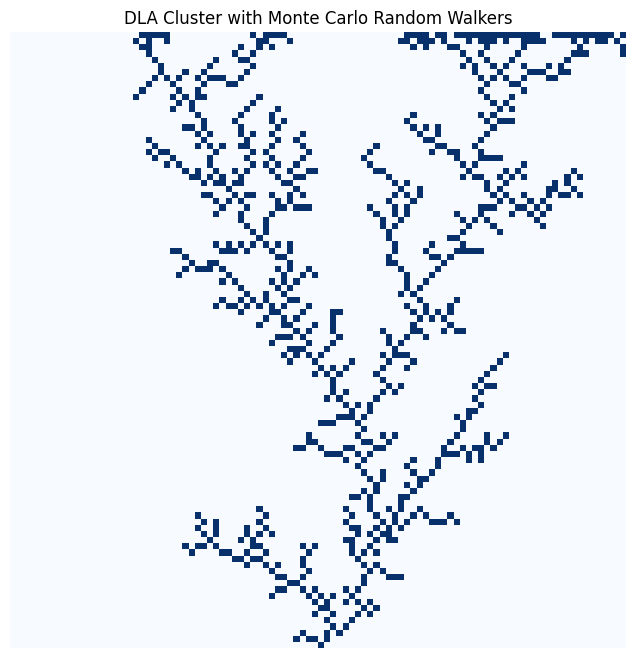

In [22]:
# Plot the result
plt.figure(figsize=(8, 8))
plt.imshow(domain, cmap='Blues')
plt.title('DLA Cluster with Monte Carlo Random Walkers')
plt.axis('off')
plt.show()


In [ ]:
def run_dla(size, seed_position, num_walkers, stick_probs):
    results = []

    for ps in stick_probs:
        domain = np.zeros((size, size), dtype=int)
        domain[seed_position] = 1  # Start with a seed

        # Function for performing a single random walk
        def random_walk():
            x, y = 0, np.random.randint(size)  # Start from top boundary
            
            while True:
                step_x, step_y = np.random.choice([-1, 0, 1]), np.random.choice([-1, 0, 1])
                if step_x != 0 and step_y != 0:  # Prevent diagonal movement
                    continue

                x, y = x + step_x, (y + step_y) % size  # Apply periodic boundary conditions horizontally
                
                if x < 0:  # Reset to top if moving out from top
                    x = 0
                elif x >= size:  # Remove walker if it moves out from bottom
                    return False
                
                # Check if next to the cluster
                if np.any(domain[max(0, x-1):min(size, x+2), max(0, y-1):min(size, y+2)] == 1):
                    # Stick with probability ps
                    if np.random.random() < ps:
                        return (x, y)  # Walker sticks

        # Main loop for DLA growth
        for _ in range(num_walkers):
            result = random_walk()
            if result:
                domain[result] = 1  # Add new point to the cluster

        results.append((ps, domain.copy()))

    return results

# Parameters
size = 100
seed_position = (size - 1, size // 2)  # Starting at the bottom center
num_walkers = 5000  # Number of walkers
stick_probs = [0.1, 0.5, 0.9]  # Different sticking probabilities

# Run simulations
results = run_dla(size, seed_position, num_walkers, stick_probs)

# Plotting results
fig, axs = plt.subplots(1, len(stick_probs), figsize=(20, 5))
for i, (ps, domain) in enumerate(results):
    axs[i].imshow(domain, cmap='Reds')
    axs[i].set_title(f'p_s = {ps}')
    axs[i].axis('off')
plt.tight_layout()
plt.show()
